# **Checkpoint 01 - Modelagem de Dados e Aprendizagem de Máquina**

## **Objetivo**
Avaliar conceitos sobre Modelagem de dados e Aprendizado de Máquina (ML) adquiridos no curso.

## **Descrição do Desafio**
Você foi contratado por uma empresa que desenvolveu uma plataforma de compra e venda de carros usados. O funcionamento é bem simples, os usuários cadastram o carro que querem vender e esperam que outro usuário os compre, a empresa então fica com uma parte do valor de venda. Seu papel é desenvolver um modelo que possa determinar qual o melhor preço de venda para um usado.

Para nortear o desenvolvimento, você precisa de um ponto de partida e determinou uma pergunta chave: **Qual o preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados?**

### **Orientações**
Para responder a essa pergunta, você deve utilizar o dataset da empresa, que está representado no arquivo **carros.csv**, e seguir o roteiro proposto neste desafio.

## **Exploração de Dados - 2 pontos**

1 - Carregue o dataset e faça a inspeção nas 15 primeiras linhas para identificação dos atributos. Quantos dados existem nesse dataset? Qual a quantidade de atributos? Existem valores faltantes? De que tipo são os dados? (1,0)

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

df = pd.read_csv("carros.csv")

tipos = [str(dtype) for dtype in df.dtypes.unique()]
print(df.shape[0], "dados e", df.shape[1], "atributos estão presentes nesse dataset, com", df.isnull().sum().sum(), "valores faltantes. Os tipos dos dados são:", tipos)

df.head(15)

4345 dados e 9 atributos estão presentes nesse dataset, com 322 valores faltantes. Os tipos dos dados são: ['object', 'float64', 'int64']


,Brand,Price,Body,Mileage/1000,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


2 - Note que os dataset está no sistema americano. Converta os dados para o sistema métrico e altere o cabeçalho de forma que os dados façam sentido. (1,0)

Obs: Os dados de Milhas dividos por mil, ou seja, multiplique o valor por 1.000 para ter o valor real!

In [ ]:
df = df.rename(columns={"Mileage/1000": "Kms","Registration": "Cadastro","Brand": "Marca", "Price": "Preco", "EngineV": "Motor", "Engine Type": "Tipo", 
                         "Year": "Ano", "Model": "Versão", "Body": "Modelo"})
df["Kms"] = df["Kms"] * 1000 * 1.60934
df['Cadastro'] = df['Cadastro'].replace('no',0).replace('yes',1)
df.head(5)

,Marca,Preco,Modelo,Kms,Motor,Tipo,Cadastro,Ano,Versão
0,BMW,4200.0,sedan,445787.18,2.0,Petrol,1,1991,320
1,Mercedes-Benz,7900.0,van,687188.18,2.9,Diesel,1,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,576143.72,5.0,Gas,1,2003,S 500
3,Audi,23000.0,crossover,386241.60,4.2,Petrol,1,2007,Q7
4,Toyota,18300.0,crossover,193120.80,2.0,Petrol,1,2011,Rav 4


## **Analise descritiva dos dados - 2 pontos**

3 - Faça uma análise exploratória dos dados, utilizando gráficos e tabelas para realizar correlações entre os atributos e que permitam criar um cenário de correlação entre eles.

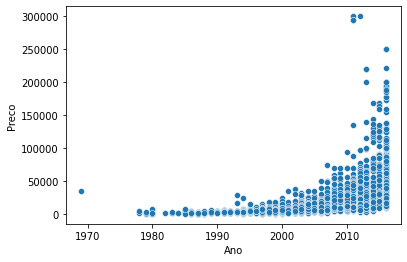

In [ ]:
df = df.dropna()

sns.scatterplot(x='Ano', y='Preco',  data=df)

plt.show()

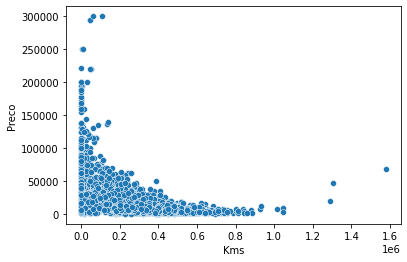

In [ ]:
sns.scatterplot(x='Kms', y='Preco', data=df)

plt.show()

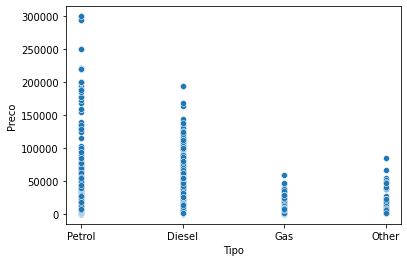

In [ ]:
sns.scatterplot(x='Tipo', y='Preco', data=df)

plt.show()

## **Desenvolvimento do Modelo - 2 pontos**

4 - O conjunto de dados indica a aplicação de qual modelo de aprendizagem de máquina para responder a pergunta do desafio? Por quê? (1,0)

- O modelo de aprendizagem supervisionado, pois estamos alimentando o algoritmo com dados e ajustando o modelo para minimizar o erro entre as saídas previstas e as saídas desejadas.

5 - Qual a técnica sugerida para este projeto? Por quê? (1,0)

- Estamos usando uma tecnica regressiva de dados pois não estamos trabalhando com objetivo de classificar, mas sim com algo variado como números.

Com base nas suas respostas, agora escolha dois algortimos para implementar e comparar a performance de cada um deles ao final do desafio.

Resposta:

Algoritmo 1: Regressão linear simples e múltipa

Algoritmo 2: KNeighborsRegressor

## **Treinamento e teste do Modelo - 3 pontos**

6 - Crie um subset dos dados que serão utilizados para o treinamento e para o teste do modelo. Divida este subset em treino e teste. (1,0) 

In [ ]:

X = df[['Ano']]
y = df[['Preco']]

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

7 - Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

7.1 - Algoritmo 1: (0,5)


In [ ]:

model = LinearRegression()
model.fit(X_treino, y_treino)
previsao  = model.predict(X_teste)
r2 = r2_score(y_teste,previsao)
rmse = np.sqrt(mean_absolute_error(y_teste, previsao))
print(f"r² score = {r2}\nrmse = {rmse}")


r² score = 0.2545843656393343
rmse = 111.50177249468928


In [ ]:
X = df[['Ano','Kms','Motor','Cadastro']]
y = df[['Preco']]

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size= 0.3,random_state=42)

model = LinearRegression()
model.fit(X_treino, y_treino)
previsao  = model.predict(X_teste)
r2 = r2_score(y_teste,previsao)
rmse = np.sqrt(mean_absolute_error(y_teste, previsao))
print(f"r² score = {r2}\nrmse = {rmse}")

r² score = 0.29405332150320485
rmse = 110.2885488668009


7.2 - Algoritmo 2:  (0,5)

In [ ]:

model = KNeighborsRegressor(n_neighbors=10)

X = df[['Ano','Kms','Motor','Cadastro']]
y = df[['Preco']]

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size= 0.3, random_state = 42)

model.fit(X_treino, y_treino)
previsao = model.predict(X_teste)

r2 = r2_score(y_teste,previsao)
rmse = np.sqrt(mean_absolute_error(y_teste, previsao))
print(f"r² score = {r2}\nrmse = {rmse}")

r² score = 0.640699280478823
rmse = 92.62023812285183


7.3 - Qual dos algortimos obteve melhor resultado? Por quê? (1,0)

- Pode-se observar que o KNeighbornsRegressor teve o r² e rmse maiores e melhores que o modelo LinearRegression.

## **Modelo de Produção: Teste com novos dados - 1 ponto**

8 - Use o seu modelo treinado para responder a pergunta do desafio:

In [ ]:
# Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados
predicao = model.predict([[2005,172095,2.0,1]])
print(predicao)


[[17479.8]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


- O Preço de venda de um veículo Volkswagen Sedan 2.0 a gasolina, ano 2005, com cerca de 172095 km rodados ficará entorno de 17479.8.
